In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [99]:
# df = pd.read_parquet("./Energy-graph/data/energy-forecast/data/uciml-dataset-hourly.parquet")

household = pd.read_parquet("./Energy-graph/data/energy-forecast/data/processed/uciml_household.parquet")





# Additional Information

- sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas - powered).
- sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



In [122]:
def calculate_loadprofiles(df: pd.DataFrame) -> dict:
    hourly = df.resample("H").sum()
    daily = df.resample("D").sum()

    # Calculate load profiles
    loadprofiles = {}
    for column in df.columns:
        
        lp_daily = hourly[column].groupby(hourly.index.hour).mean().values
        lp_weekly = daily[column].groupby(daily.index.dayofweek).mean().values
        lp_monthly = daily[column].groupby(daily.index.day).mean().values

        loadprofiles[column] = {
            "daily": lp_daily,
            "weekly": lp_weekly,
            "monthly": lp_monthly,
        }

    return loadprofiles

def preprocess_dataframe(df):
    df = df.copy()
    df.set_index("timestamp", inplace=True)
    df.drop(columns=["country", "region", "lat", "lon", "tz", "voltage", "global_reactive_power", "global_intensity", "unmetered"], inplace=True)
    df /= 1000 # to kWh
    return df

In [123]:
df = preprocess_dataframe(household)
loadprofiles = calculate_loadprofiles(df)



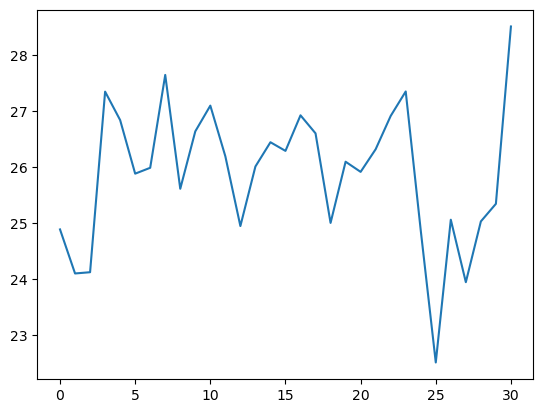

In [124]:
plt.plot(loadprofiles["global_active_power"]["monthly"])